Heatmap saved as Sector_Return_Heatmap_Report.pdf
Returns data saved as Sector_Returns_Data.csv


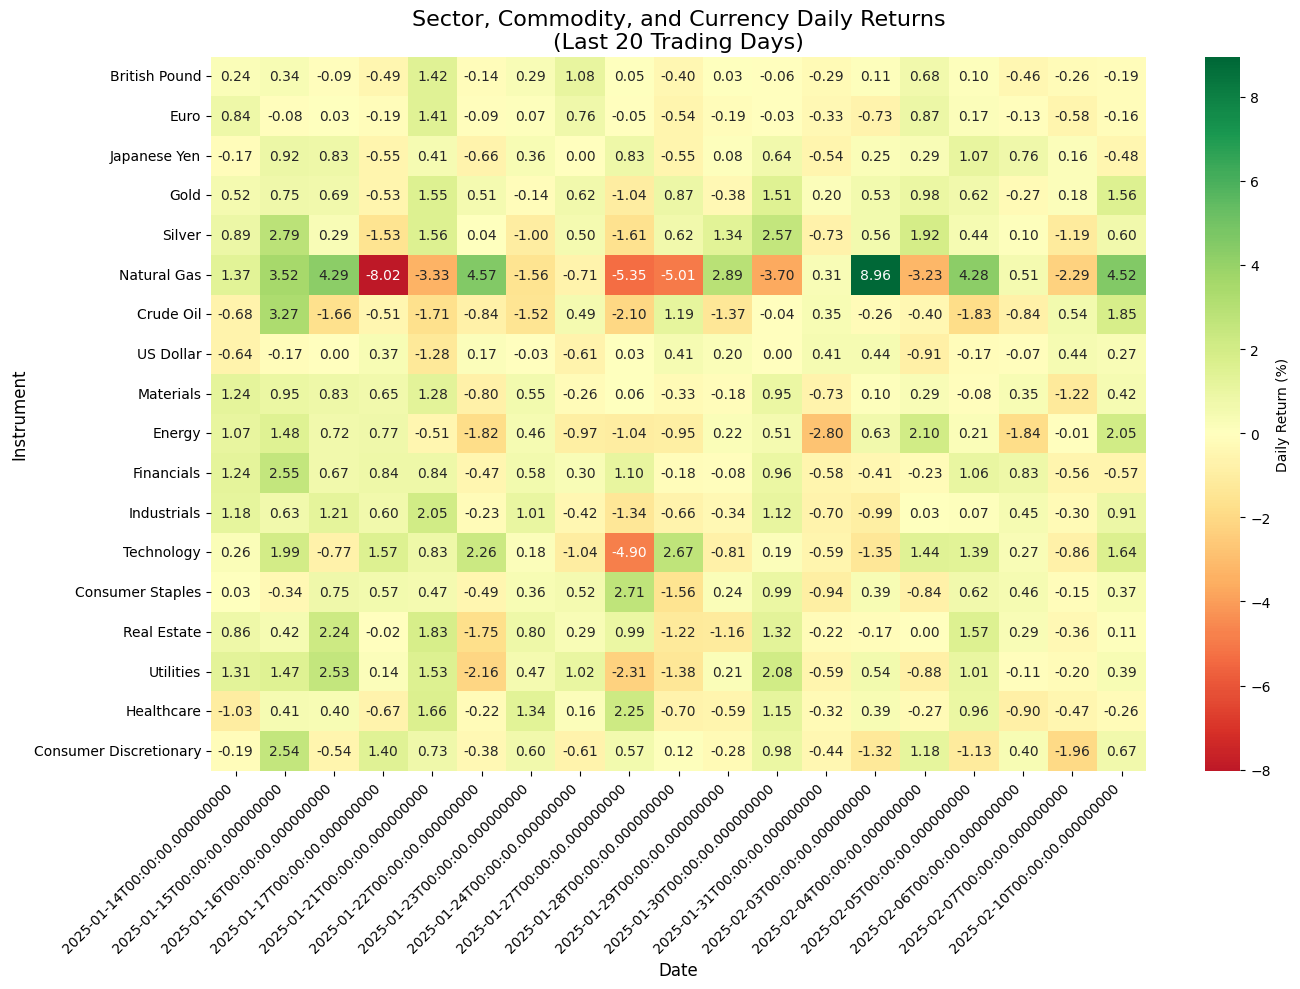

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary mapping ticker symbols to instrument names.
# These represent various U.S. sectors, commodities, and currencies.
sector_instruments = {
    "XLF": "Financials",
    "XLY": "Consumer Discretionary",
    "XLV": "Healthcare",
    "XLI": "Industrials",
    "XLE": "Energy",
    "XLP": "Consumer Staples",
    "XLK": "Technology",
    "XLU": "Utilities",
    "XLB": "Materials",
    "XLRE": "Real Estate",
    "GLD": "Gold",
    "USO": "Crude Oil",
    "UNG": "Natural Gas",
    "SLV": "Silver",
    "UUP": "US Dollar",
    "FXE": "Euro",
    "FXY": "Japanese Yen",
    "FXB": "British Pound"
}

# Get the list of tickers from the dictionary keys.
tickers = list(sector_instruments.keys())

# Download data for these instruments.
# Using a 2-month period to ensure we capture at least 20 trading days.
prices = yf.download(tickers, period="2mo", interval="1d", progress=False)["Close"]

# Drop any rows where all instruments are missing and then select the most recent 20 trading days.
prices = prices.dropna(how='all')
recent_prices = prices.tail(20)

# Compute daily returns (in percentage terms)
daily_returns = recent_prices.pct_change() * 100
daily_returns = daily_returns.dropna()  # Drop the first row (which is NaN)

# Create the data for the heatmap:
# Transpose the returns so that rows = instruments and columns = dates.
heatmap_data = daily_returns.T

# Rename the rows using the instrument names from our dictionary.
heatmap_data.index = [sector_instruments[ticker] for ticker in heatmap_data.index]

# Create a heatmap of the daily returns.
plt.figure(figsize=(14, 10))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn", center=0,
                 cbar_kws={'label': 'Daily Return (%)'})
plt.title("Sector, Commodity, and Currency Daily Returns\n(Last 20 Trading Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Instrument", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the heatmap as a PDF file.
pdf_filename = "Sector_Return_Heatmap_Report.pdf"
plt.savefig(pdf_filename, format="pdf")
print(f"Heatmap saved as {pdf_filename}")

# Save the underlying returns data as a CSV file.
csv_filename = "Sector_Returns_Data.csv"
heatmap_data.to_csv(csv_filename)
print(f"Returns data saved as {csv_filename}")

plt.show()
